In [6]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


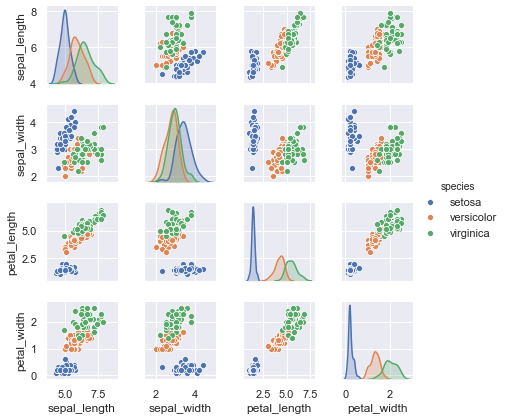

In [7]:
%matplotlib inline
sns.pairplot(iris, hue="species", size=1.5);

In [8]:
x_iris = iris.drop('species', 1)
y_iris = iris["species"]
x_iris.shape, y_iris.shape

((150, 4), (150,))

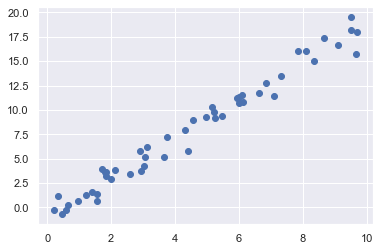

In [9]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X  = x[:, np.newaxis]
X.shape
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.coef_, model.intercept_

(array([1.9776566]), -0.903310725531111)

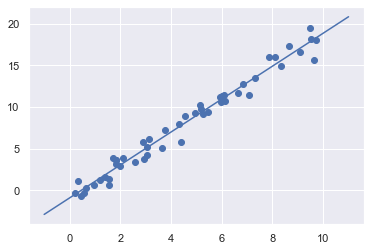

In [12]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [13]:
#IRIS data
'''For this task, we will use an extremely simple generative model known as Gaussian
naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned
Gaussian distribution (see “In Depth: Naive Bayes Classification” on page 382 for
more details). Because it is so fast and has no hyperparameters to choose, Gaussian
naive Bayes is often a good model to use as a baseline classification, before you
explore whether improvements can be found through more sophisticated models'''

import seaborn as sns
iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis=1)
y_iris = iris["species"]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=32)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [15]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
X_2D = model.fit_transform(X_iris)

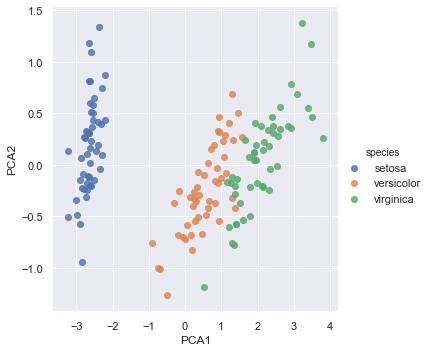

In [16]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

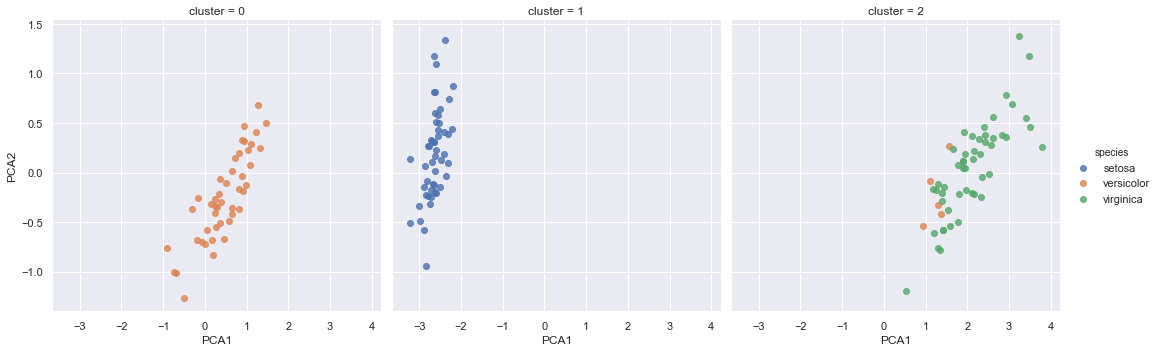

In [17]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3, covariance_type = 'full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2", data = iris, hue='species', col="cluster", fit_reg = False);

In [18]:
#digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

import matplotlib.pyplot as plt
'''fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')'''

X = digits.data
y = digits.target

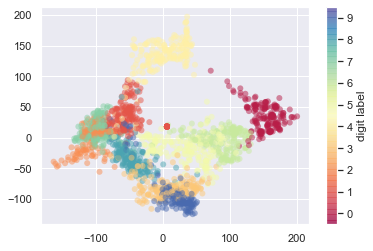

In [19]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
#data_projected.shape

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.Spectral)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(77.10000000000001, 0.5, 'true value')

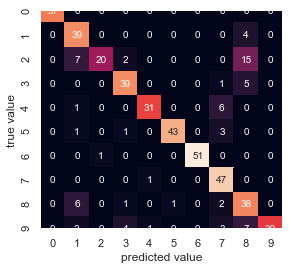

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [22]:
'''fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
    transform=ax.transAxes,
    color='green' if (ytest[i] == y_model[i]) else 'red')'''

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
X = iris.drop('species', axis=1)
y = iris["species"]

'''model.fit(X, y)
y_model = model.predict(X)
accuracy_score(y_model, y)'''

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9333333333333333

In [23]:
from sklearn.model_selection import cross_val_score
#cross_val_score(model, X, y, cv=5)
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut() )
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

### Feature Engineering

In [24]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

from sklearn.feature_extraction import DictVectorizer
#vec = DictVectorizer(sparse=False, dtype=int)
#vec.fit_transform(data)
#vec.get_feature_names()
vec = DictVectorizer(sparse=True, dtype=int)
'''Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs
when fitting and evaluating models. sklearn.preprocessing.OneHotEncoder and
sklearn.feature_extraction.FeatureHasher are two additional tools that Scikit-
Learn includes to support this type of encoding.'''
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [25]:
sample = {"abhi":'problem of evil', "shek":'evil queen', "diksha":'horizon problem'}
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample.values())

import pandas as pd
pd.DataFrame(X.toarray(), columns = vec.get_feature_names(), index = sample.keys())

,evil,horizon,of,problem,queen
abhi,1,0,1,1,0
shek,1,0,0,0,1
diksha,0,1,0,1,0


In [26]:
'''There are some issues with this approach, however: the raw word counts lead to features
that put too much weight on words that appear very frequently, and this can be
suboptimal in some classification algorithms. One approach to fix this is known as
term frequency–inverse document frequency (TF–IDF), which weights the word counts
by a measure of how often they appear in the documents. The syntax for computing
these features is similar to the previous example:'''

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample.values())
pd.DataFrame(X.toarray(), columns = vec.get_feature_names(), index = sample.keys())

,evil,horizon,of,problem,queen
abhi,0.517856,0.000000,0.680919,0.517856,0.000000
shek,0.605349,0.000000,0.000000,0.000000,0.795961
diksha,0.000000,0.795961,0.000000,0.605349,0.000000


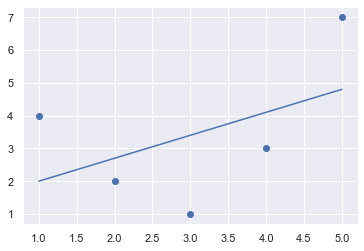

In [27]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.plot(x, yfit)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


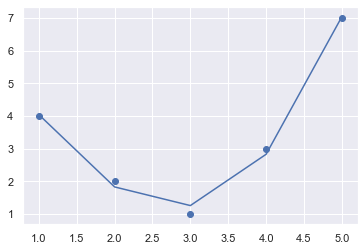

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

In [29]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
                [ 3, 7, 9 ],
                [ 3, 5, 2 ],
                [ 4, nan, 6 ],
                [ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [30]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy="mean"), PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


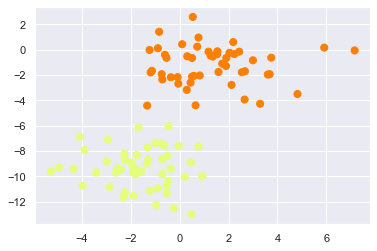

In [31]:
#In depth NAIVE BAYES CLASSIFICATION

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="Wistia")

[[0.89 0.11]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.15 0.85]]


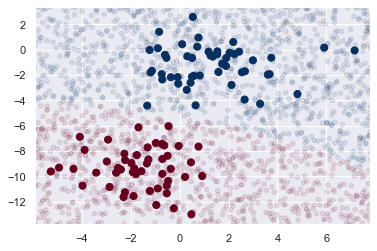

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);
yprob = model.predict_proba(Xnew)
print(yprob[-8:].round(2))

In [33]:
#Multinomial NB
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



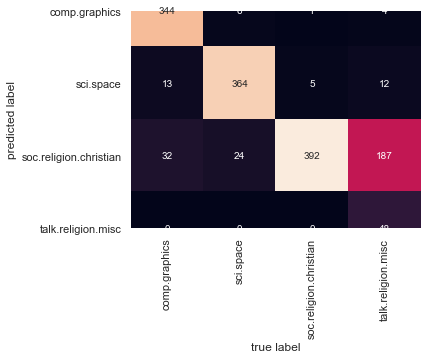

In [34]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Model slope:  2.0272088103606944
Model intercept: -4.9985770855532


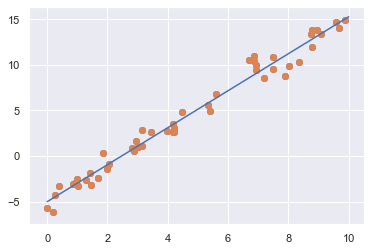

In [35]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

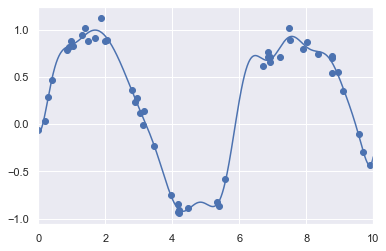

In [36]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

from sklearn.base import TransformerMixin, BaseEstimator

class GaussianFeatures(BaseEstimator, TransformerMixin):
    '''Uniformly spaced gaussian features for one dimensional input'''
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x-y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, x, y=None):
        # create N centers spread along the data range 
        self.centers_ = np.linspace(x.min(), x.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, x):
        return self._gauss_basis(x[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [37]:
# REGULARIZATION
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
    model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
    ylabel='coefficient',
    xlim=(0, 10))
    model = make_pipeline(GaussianFeatures(30), LinearRegression())
    basis_plot(model)

'''from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title="RidgeRegression")'''

'from sklearn.linear_model import Ridge\nmodel = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))\nbasis_plot(model, title="RidgeRegression")'

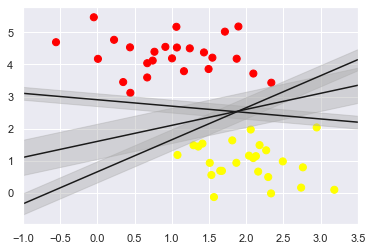

In [38]:
# INDEPTH - SVMs
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns; sns.set()

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

'''xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);'''

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

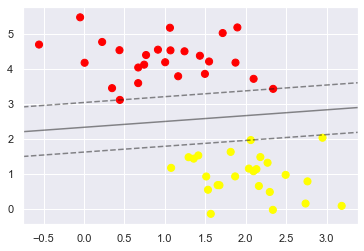

In [40]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

#PLOT SVM METHOD is left to be included
# pLTO 3D FOR KERNEL SVM

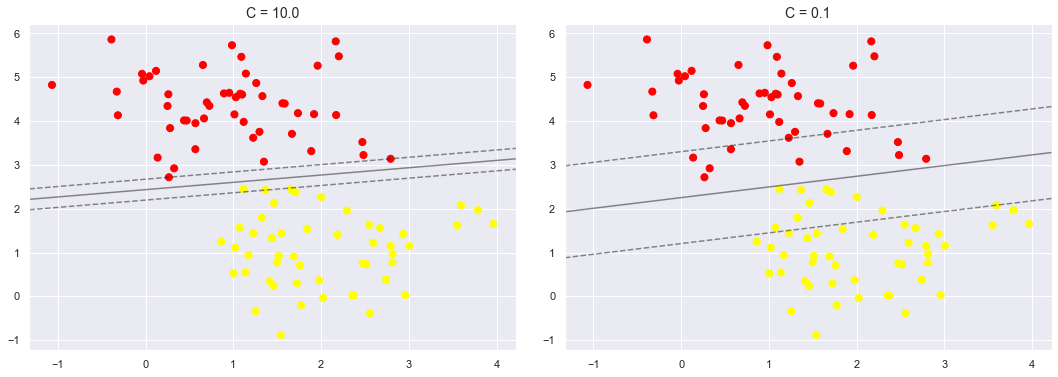

In [41]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [45]:
#face dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

ImportError: The Python Imaging Library (PIL) is required to load data from jpeg files

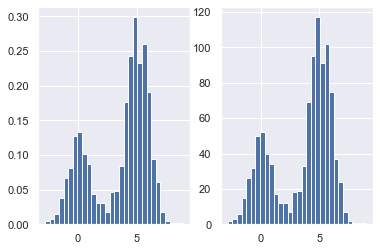

In [50]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)
fig, ax = plt.subplots(1, 2)
hist = ax[0].hist(x, bins=30, density=True)
hist2=ax[1].hist(x, bins=30, density=False)

In [51]:
np.full_like?